In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats

import os, sys

project_root = '/user_data/mmhender/featsynth/'
sys.path.insert(0, os.path.join(project_root, 'code'))
from utils import stats_utils, plot_utils


In [2]:
# load image info
image_set_name = 'images_ecoset'
image_list_filename = os.path.join(project_root, 'features','raw', '%s_list.csv'%(image_set_name))
labels = pd.read_csv(image_list_filename)

# figure out some image/category properties here
n_ims_each = np.sum(np.array(labels['basic_name'])==np.array(labels['basic_name'])[0])
basic_names = np.array(labels['basic_name'][0::n_ims_each])
super_names_long = np.array(labels['super_name'][0::n_ims_each])

n_basic = len(basic_names)
n_super = len(np.unique(super_names_long))
n_basic_each_super  = int(n_basic/n_super)
super_names = super_names_long[0::n_basic_each_super]
super_inds_long = np.repeat(np.arange(n_super), n_basic_each_super)

# more image properties to organize images
image_type_names = ['orig']
n_image_types = len(image_type_names)
cue_level_names = ['basic','super']

In [3]:
layer_names = ['pool1','pool2','pool3', 'pool4']
n_layers = len(layer_names)

d_all = dict()

n_ims_vals = [128, 256, 496]
# n_ims_vals = [128, 256]

n_v = len(n_ims_vals)

basic_acc = np.zeros((1, n_layers, n_v))
basic_dprime = np.zeros((1, n_layers, n_v))
super_acc = np.zeros((1, n_layers, n_v))
super_dprime = np.zeros((1, n_layers, n_v))
super_acc_each_supcat = np.zeros((n_super, n_layers, n_v))
super_dprime_each_supcat = np.zeros((n_super, n_layers, n_v))
basic_acc_each_bascat = np.zeros((n_basic, n_layers, n_v))
basic_dprime_each_bascat = np.zeros((n_basic, n_layers, n_v))

super_acc_rand = np.zeros((1, n_layers, 1, 1000))
super_dprime_rand = np.zeros((1, n_layers, 1, 1000))

for li, layer_name in enumerate(layer_names):
    
    for ni in range(n_v):

        save_dir = os.path.join(project_root, 'features', 'gram_matrices', 'categ_discrim')
        fn2load = os.path.join(save_dir, \
                               'categ_discrim_allbasic_images_ecoset_%s_%dpercateg.npy'%\
                               (layer_name, n_ims_vals[ni]))
        print(fn2load)
        d = np.load(fn2load, allow_pickle=True).item()

        # print(d.keys())
        
        basic_acc[:,li,ni] = d['basic_acc'][0]
        basic_dprime[:,li,ni] = d['basic_dprime'][0]
        super_acc[:,li,ni] = d['super_acc']
        super_dprime[:,li,ni] = d['super_dprime']
    
        basic_acc_each_bascat[:,li,ni] = d['basic_acc_each_bascat']
        basic_dprime_each_bascat[:,li,ni] = d['basic_dprime_each_bascat']
        super_acc_each_supcat[:,li,ni] = d['super_acc_each_supcat']
        super_dprime_each_supcat[:,li,ni] = d['super_dprime_each_supcat']

        if ni==0:
            super_acc_rand[:,li,:,:] = d['super_acc_rand']
            super_dprime_rand[:,li,:,:] = d['super_dprime_rand']
            

/user_data/mmhender/featsynth/features/gram_matrices/categ_discrim/categ_discrim_allbasic_images_ecoset_pool1_128percateg.npy
/user_data/mmhender/featsynth/features/gram_matrices/categ_discrim/categ_discrim_allbasic_images_ecoset_pool1_256percateg.npy
/user_data/mmhender/featsynth/features/gram_matrices/categ_discrim/categ_discrim_allbasic_images_ecoset_pool1_496percateg.npy
/user_data/mmhender/featsynth/features/gram_matrices/categ_discrim/categ_discrim_allbasic_images_ecoset_pool2_128percateg.npy
/user_data/mmhender/featsynth/features/gram_matrices/categ_discrim/categ_discrim_allbasic_images_ecoset_pool2_256percateg.npy
/user_data/mmhender/featsynth/features/gram_matrices/categ_discrim/categ_discrim_allbasic_images_ecoset_pool2_496percateg.npy
/user_data/mmhender/featsynth/features/gram_matrices/categ_discrim/categ_discrim_allbasic_images_ecoset_pool3_128percateg.npy
/user_data/mmhender/featsynth/features/gram_matrices/categ_discrim/categ_discrim_allbasic_images_ecoset_pool3_256perca

In [4]:
level_colors = np.array([[93,192,219], [44,92,168]])/255
level_names = ['basic','super']

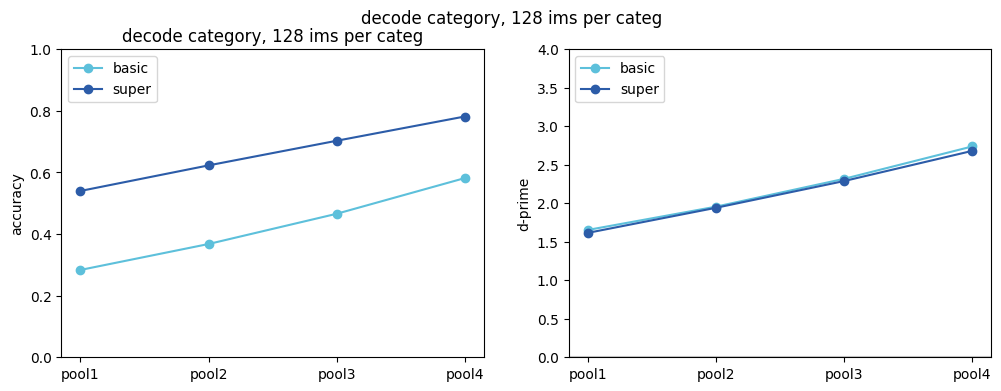

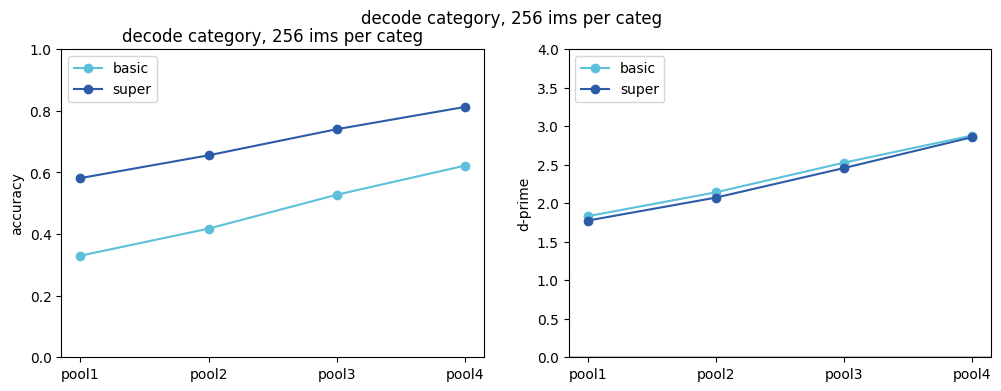

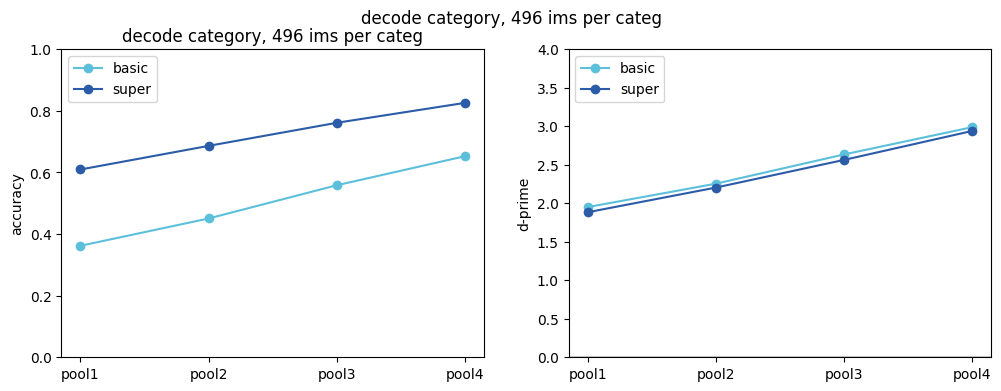

In [5]:
level_colors = np.array([[93,192,219], [44,92,168]])/255
level_names = ['basic','super']

for ni in range(n_v):


    vals = np.array([np.mean(basic_acc[:,:,ni], axis=0, keepdims=True), \
                     super_acc[:,:,ni]])

    plt.figure(figsize=(12,4))
    ax = plt.subplot(1,2,1)
    lh = []
    for cc in range(2):

        h = plt.plot(vals[cc,0,:], 'o-', color=level_colors[cc,:])

        plt.xticks(np.arange(n_layers), layer_names)

        lh += [h[0]]

    plt.legend(lh, level_names, loc='upper left')
    
    plt.ylim([0, 1])

    # plt.axhline(1/8, color=[0.8, 0.8, 0.8])

    plt.ylabel('accuracy')

    plt.title('decode category, %d ims per categ'%n_ims_vals[ni])


    vals = np.array([np.mean(basic_dprime[:,:,ni], axis=0, keepdims=True), \
                     super_dprime[:,:,ni]])

    # plt.figure(figsize=(6,4))
    ax = plt.subplot(1,2,2)
    lh = []
    for cc in range(2):

        h = plt.plot(vals[cc,0,:], 'o-', color=level_colors[cc,:])

        plt.xticks(np.arange(n_layers), layer_names)

        lh += [h[0]]

    plt.legend(lh, level_names, loc='upper left')

    plt.axhline(0, color=[0.8, 0.8, 0.8])
    plt.ylabel('d-prime')
    
    plt.ylim([0, 4])

    plt.suptitle('decode category, %d ims per categ'%n_ims_vals[ni])

#### compute predicted superordinate performance 
if there is only basic-level discrimination (no superordinate structure)

In [6]:
# functions to convert between basic-level and superordinate-level accuracy and d'
# if we assume that all 64 basic-level categories are perfectly equal

def acc_bas_to_sup(bas_acc):

    p_correct_basic = bas_acc
    
    p_incorrect_basic = 1-p_correct_basic
    
    p_correct_super = p_correct_basic  + p_incorrect_basic / (n_basic-1) * (n_basic_each_super-1)
    p_incorrect_super = p_incorrect_basic / (n_basic-1) * (n_basic - n_basic_each_super)

    sup_acc = p_correct_super

    return sup_acc

def dprime_bas_to_sup(bas_dprime, bas_acc):

    bas_hr = bas_acc
    bas_hrz = scipy.stats.norm.ppf(bas_hr)
    
    bas_fpz = bas_hrz - bas_dprime
    bas_fp = scipy.stats.norm.cdf(bas_fpz)

    # print(bas_hr, bas_fp)

    # this can be anything, cancels out
    n_trials_each_basic = 100
    
    # total number that actually fall in each super 
    n_total_actual_super = n_trials_each_basic * n_basic_each_super
    
    n_total_other_super = n_trials_each_basic * (n_basic_each_super * (n_super-1))
    
    
    # get total num false positives (for each basic)
    n_labeled_bas_fp = bas_fp * (n_trials_each_basic * (n_basic-1))
    
    # separate them into groups
    # labeled as wrong basic, actually in correct super
    n_labeled_bas_fp1 = n_labeled_bas_fp / (n_basic-1) * (n_basic_each_super - 1)
    
    # labeled as wrong basic, actually in wrong super
    n_labeled_bas_fp2 = n_labeled_bas_fp / (n_basic-1) * (n_basic - n_basic_each_super)
    
    
    
    # get total correctly labeled
    n_total_labeled_basic = bas_hr * n_trials_each_basic 
    
    # this includes some of the "false positives" from before, which are correct in super
    n_total_labeled_super = n_total_labeled_basic * n_basic_each_super + \
                            n_labeled_bas_fp1 * n_basic_each_super

    # get superordinate hit rate
    sup_hr = n_total_labeled_super / n_total_actual_super
    
    
    # get fp rate - now counting just the false positives that are wrong super
    n_total_labeled_super_fp = n_labeled_bas_fp2 * n_basic_each_super
    
    sup_fp = n_total_labeled_super_fp / n_total_other_super

    # print(sup_hr, sup_fp)

    # get dprime
    sup_hrz=scipy.stats.norm.ppf(sup_hr,0,1);
    sup_fpz=scipy.stats.norm.ppf(sup_fp,0,1);
    
    sup_dprime = sup_hrz - sup_fpz
    

    return sup_dprime
    

#### actual superordinate performance exceeds the prediction

Text(0.5, 0.98, 'decode category, 128 ims per categ')

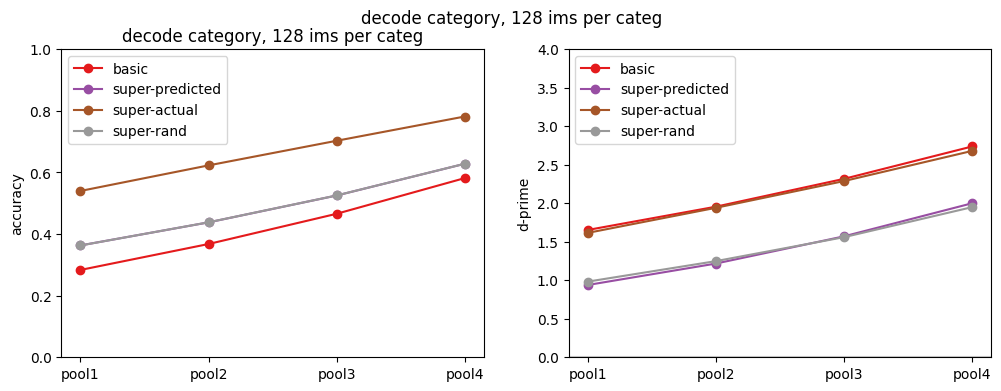

In [7]:
level_colors = cm.Set1(np.linspace(0, 1, 4))
level_names = ['basic','super-predicted','super-actual','super-rand']

ni = 0;
# for ni in range(n_v):

# predict what superordinate d' will be if all basic-level categories are uniform 
# (no superordinate structure)
acc_super_predicted = acc_bas_to_sup(np.mean(basic_acc[:,:,0], axis=0, keepdims=True))

vals = np.array([np.mean(basic_acc[:,:,0], axis=0, keepdims=True), \
                 acc_super_predicted,  \
                 super_acc[:,:,0], 
                 np.mean(super_acc_rand[:,:,0,:], axis=2)])

# vals = np.concatenate([vals, bas_to_sup(vals[0])], axis=0)

plt.figure(figsize=(12,4))
ax = plt.subplot(1,2,1)
lh = []
for cc in range(len(vals)):
# for cc in range(3):

    h = plt.plot(vals[cc,0,:], 'o-', color=level_colors[cc,:])

    plt.xticks(np.arange(n_layers), layer_names)

    lh += [h[0]]

plt.legend(lh, level_names, loc='upper left')

plt.ylim([0, 1])

# plt.axhline(1/8, color=[0.8, 0.8, 0.8])

plt.ylabel('accuracy')

plt.title('decode category, %d ims per categ'%n_ims_vals[ni])

# predict what superordinate d' will be if all basic-level categories are uniform 
# (no superordinate structure)
dprime_super_predicted = dprime_bas_to_sup(np.mean(basic_dprime[:,:,ni], axis=0, keepdims=True), \
                                   np.mean(basic_acc[:,:,0], axis=0, keepdims=True))

vals = np.array([np.mean(basic_dprime[:,:,ni], axis=0, keepdims=True), \
                 dprime_super_predicted, \
                 super_dprime[:,:,ni], \
                np.mean(super_dprime_rand[:,:,0,:], axis=2)])

level_names = ['basic','super-predicted','super-actual','super-rand']

# plt.figure(figsize=(6,4))
ax = plt.subplot(1,2,2)
lh = []
for cc in range(4):

    h = plt.plot(vals[cc,0,:], 'o-', color=level_colors[cc,:])

    plt.xticks(np.arange(n_layers), layer_names)

    lh += [h[0]]

plt.legend(lh, level_names, loc='upper left')

plt.axhline(0, color=[0.8, 0.8, 0.8])
plt.ylabel('d-prime')

plt.ylim([0, 4])

plt.suptitle('decode category, %d ims per categ'%n_ims_vals[ni])

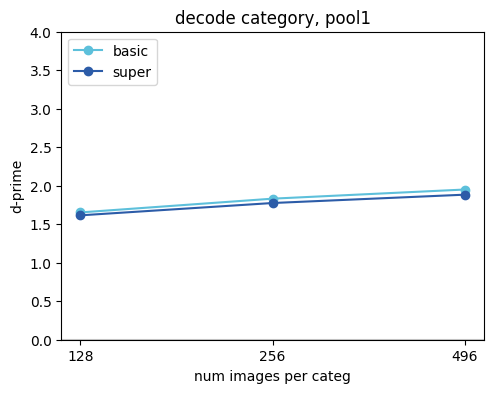

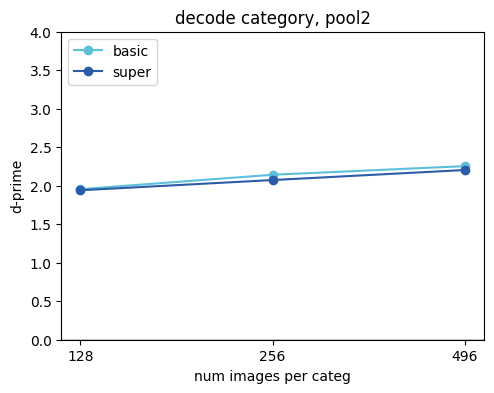

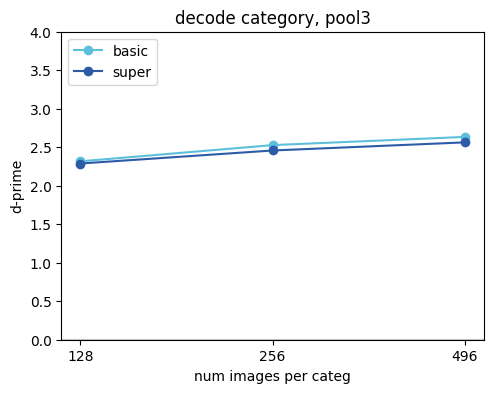

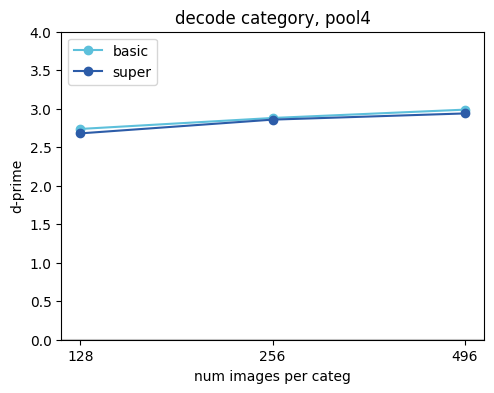

In [8]:
for li in range(4):

    vals = np.array([np.mean(basic_dprime[:,li,:], axis=0, keepdims=True), \
                     super_dprime[:,li,:]])

    plt.figure(figsize=(12,4))
    ax = plt.subplot(1,2,1)
    lh = []
    for cc in range(2):

        h = plt.plot(vals[cc,0,:], 'o-', color=level_colors[cc,:])

        plt.xticks(np.arange(n_v), n_ims_vals)

        lh += [h[0]]
        
#     for si in range(n_super):
 
#         plt.plot(basic_dprime[si,li,:], '-', color=level_colors[0,:])
        
    plt.legend(lh, level_names, loc='upper left')

    plt.axhline(0, color=[0.8, 0.8, 0.8])

    plt.ylabel('d-prime')
    
    plt.ylim([0, 4])

    plt.title('decode category, %s'%layer_names[li])

    plt.xlabel('num images per categ')

#### plot results for individual categories

[1.66487493 1.59274105]
[1.97551748 1.92506774]
[2.36622802 2.28819079]
[2.73506118 2.6645642 ]


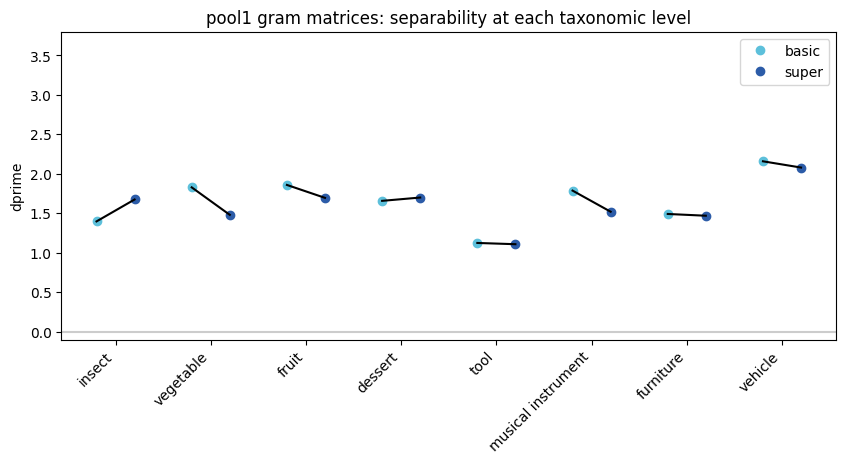

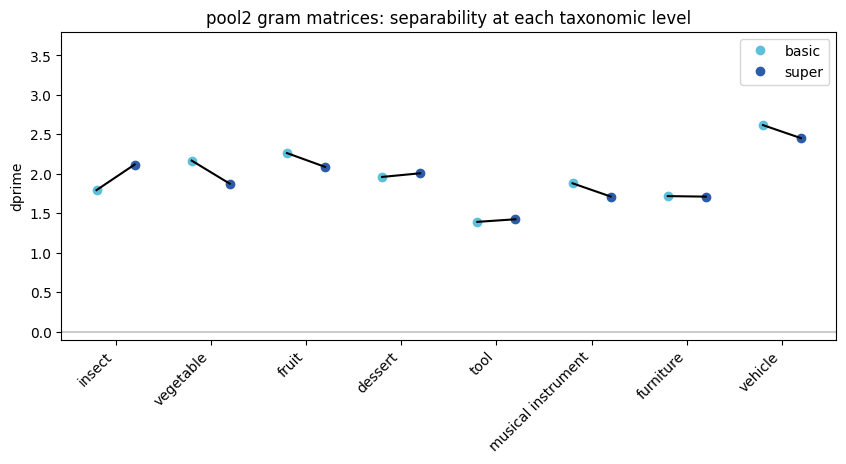

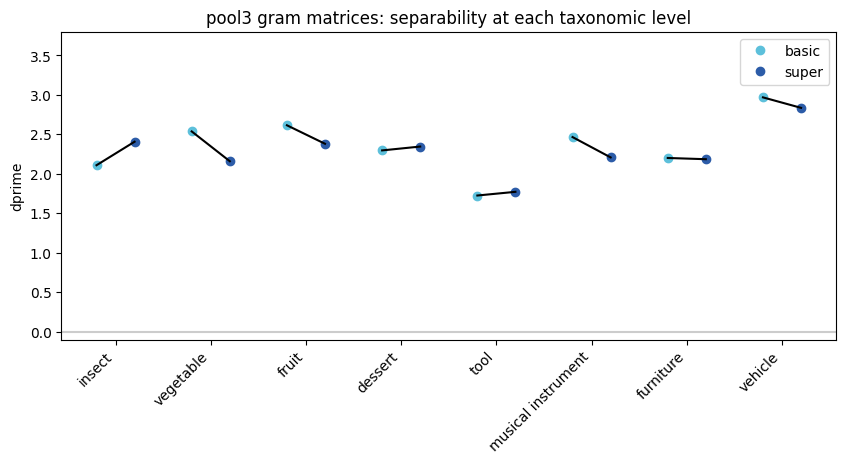

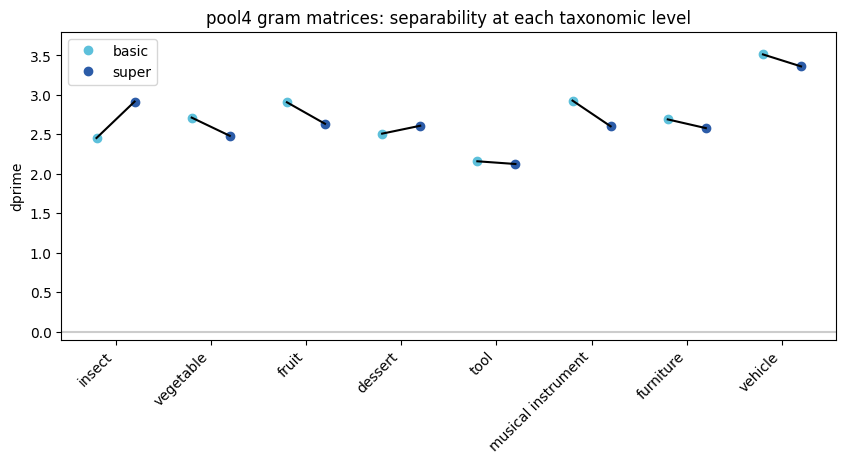

In [15]:
basic_dprime_each_supcat = np.concatenate([np.mean(basic_dprime_each_bascat[super_inds_long==si,:,:], \
                                   axis=0, keepdims=True) \
                                          for si in range(n_super)], axis=0)

ni = 0;

xjitters = np.array([-0.2, 0.2])
   
for li in range(4):
    
    
    vals = np.array([basic_dprime_each_supcat[:,li,ni], super_dprime_each_supcat[:,li,ni]])

    
    plt.figure(figsize=(10,4))
    
    lh=[]
    for ca in range(n_super):
    
        for cc in range(2):
            h = plt.plot(ca+xjitters[cc], vals[cc,ca], \
                    'o', color=level_colors[cc,:])
            if ca==0:
                lh+=h
    
        plt.plot(ca+xjitters, vals[:,ca], color='k')
    
    plt.xticks(np.arange(n_super), super_names, rotation=45, ha='right')
    
    plt.axhline(0, color=[0.8, 0.8, 0.8])
    
    plt.title('%s gram matrices: separability at each taxonomic level'%layer_names[li])
    
    plt.legend(lh, level_names)
    print(np.mean(vals, axis=1))
    
    plt.ylabel('dprime')

    plt.ylim([-0.1, 3.8])